El objetivo del presente proyecto es entrenar un modelo predictivo de enfermedad cardiovascular: diabetes.

Carga de los datos

In [1]:
import numpy as np
import pandas as pd

## visualización
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

import warnings
warnings.filterwarnings('ignore')


## pre procesado
!pip install ydata-profiling
from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport

## modelado
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## métricas
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.metrics import classification_report

## mejora de modelos
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

## automatización
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
print("="*70)
print("CARGA DEL DATASET PRINCIPAL: diabetes_dataset.csv")
print("="*70)

file_path = "/content/drive/MyDrive/Colab Notebooks/Data Diabetes/diabetes_dataset.csv"
df_raw = pd.read_csv(file_path)

df = df_raw.copy()
print(f"✓ Dataset cargado correctamente.")
print(f"· Dimensiones originales: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"· Memoria usada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n" + "-"*70)

CARGA DEL DATASET PRINCIPAL: diabetes_dataset.csv
✓ Dataset cargado correctamente.
· Dimensiones originales: 100000 filas x 31 columnas
· Memoria usada: 55.81 MB

----------------------------------------------------------------------


Exploración inicial y calidad de los datos

In [4]:
print("INSPECCIÓN INICIAL DEL DATAFRAME")
print("-"*50)

print("\n1. Primeras 5 filas:")
display(df.head())

print("\n2. Últimas 5 filas:")
display(df.tail())

print("\n3. Información de las variables:")
df.info()

INSPECCIÓN INICIAL DEL DATAFRAME
--------------------------------------------------

1. Primeras 5 filas:


,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1



2. Últimas 5 filas:


,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
99995,46,Male,Other,Graduate,Upper-Middle,Unemployed,Former,1,136,8.3,...,45,150,116,113,109,14.58,5.55,26.0,Pre-Diabetes,0
99996,41,Female,White,Graduate,Middle,Employed,Never,3,76,8.8,...,55,123,146,96,146,9.02,5.97,24.4,Pre-Diabetes,0
99997,57,Female,Black,No formal,Upper-Middle,Employed,Former,4,121,9.9,...,50,111,184,93,132,2.57,5.21,27.6,No Diabetes,0
99998,47,Female,Black,Highschool,Lower-Middle,Retired,Never,3,52,5.9,...,68,91,116,106,117,9.81,5.53,26.4,Pre-Diabetes,0
99999,52,Female,White,Postgraduate,Middle,Employed,Never,1,248,2.7,...,31,183,87,91,142,15.93,5.73,27.9,Pre-Diabetes,0



3. Información de las variables:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float6

In [5]:
print("4. Valores únicos:")
for columna in df.columns:
    unicos = df[columna].unique()
    print(f"{columna}: {len(unicos)} valores únicos")

print("\n Valores correspondientes a los valores únicos")
for columna in df.columns:
    unicos = df[columna].unique()
    print(f"\n{columna} ({len(unicos)} valores únicos):")
    print(unicos[:11])  # Primeros 11 valores
    if len(unicos) > 11:
        print(f"... y {len(unicos) - 11} más")

4. Valores únicos:
age: 73 valores únicos
gender: 3 valores únicos
ethnicity: 5 valores únicos
education_level: 4 valores únicos
income_level: 5 valores únicos
employment_status: 4 valores únicos
smoking_status: 3 valores únicos
alcohol_consumption_per_week: 11 valores únicos
physical_activity_minutes_per_week: 620 valores únicos
diet_score: 101 valores únicos
sleep_hours_per_day: 71 valores únicos
screen_time_hours_per_day: 156 valores únicos
family_history_diabetes: 2 valores únicos
hypertension_history: 2 valores únicos
cardiovascular_history: 2 valores únicos
bmi: 240 valores únicos
waist_to_hip_ratio: 40 valores únicos
systolic_bp: 86 valores únicos
diastolic_bp: 60 valores únicos
heart_rate: 64 valores únicos
cholesterol_total: 210 valores únicos
hdl_cholesterol: 79 valores únicos
ldl_cholesterol: 190 valores únicos
triglycerides: 262 valores únicos
glucose_fasting: 109 valores únicos
glucose_postprandial: 210 valores únicos
insulin_level: 2350 valores únicos
hba1c: 548 valores ú

In [6]:
print("\n5. Nulos:")
df.isnull().sum()


5. Nulos:


,0
age,0
gender,0
ethnicity,0
education_level,0
income_level,0
employment_status,0
smoking_status,0
alcohol_consumption_per_week,0
physical_activity_minutes_per_week,0
diet_score,0


No observamos la existencia de valores nulos en el conjunto de datos. Sabemos que, en caso de existir, podríamos tratar este problema con las técnicas aprendidas, imputando estos valores por otros más representativos, como la media, la mediana o la moda, según el caso. Si se tratase de una variable con demasiados nulos, deberíamos estudiar eliminar esta variable, crear una categoría, etc.

In [7]:
print("ANÁLISIS DESCRIPTIVO")
print("-"*50)

print("\n6. Estadísticas descriptivas (variables numéricas):")
display(df.describe().T) #lo trasnponemos para facilitar la lectura de la tabla

ANÁLISIS DESCRIPTIVO
--------------------------------------------------

6. Estadísticas descriptivas (variables numéricas):


,count,mean,std,min,25%,50%,75%,max
age,100000.0,50.120410,15.604600,18.00,39.00,50.00,61.00,90.00
alcohol_consumption_per_week,100000.0,2.003670,1.417779,0.00,1.00,2.00,3.00,10.00
physical_activity_minutes_per_week,100000.0,118.911640,84.409662,0.00,57.00,100.00,160.00,833.00
diet_score,100000.0,5.994787,1.780954,0.00,4.80,6.00,7.20,10.00
sleep_hours_per_day,100000.0,6.997818,1.094622,3.00,6.30,7.00,7.70,10.00
screen_time_hours_per_day,100000.0,5.996468,2.468406,0.50,4.30,6.00,7.70,16.80
family_history_diabetes,100000.0,0.219410,0.413849,0.00,0.00,0.00,0.00,1.00
hypertension_history,100000.0,0.250800,0.433476,0.00,0.00,0.00,1.00,1.00
cardiovascular_history,100000.0,0.079200,0.270052,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,25.612653,3.586705,15.00,23.20,25.60,28.00,39.20


El conjunto de datos analizado contiene 100.000 registros sin valores nulos, lo que garantiza una base sólida para el análisis estadístico y la modelización posterior.

La edad media de la población es de 50 años, con un rango amplio (18–90 años), lo que permite capturar distintos perfiles de riesgo a lo largo del ciclo vital. El BMI medio se sitúa en 25,6, indicando una población mayoritariamente en rango de sobrepeso, coherente con contextos de riesgo metabólico elevado.

En cuanto a los hábitos de vida, la actividad física semanal media es de 119 minutos, situándose por debajo de las recomendaciones de la OMS, lo que sugiere una prevalencia significativa de sedentarismo. El diet score medio se sitúa en torno a 6 sobre 10, reflejando hábitos dietéticos moderados pero mejorables. Las horas de sueño presentan una media cercana a 7 horas diarias, mientras que el tiempo de pantalla ronda las 6 horas, valores compatibles con patrones de estilo de vida urbanos.

Respecto a los factores clínicos, se observa una media de glucosa basal de 111 mg/dL y una HbA1c media de 6,52%, valores próximos o superiores a los umbrales clínicos de prediabetes, lo que refuerza la idoneidad del dataset para el estudio del riesgo diabético. Asimismo, variables como presión arterial, perfil lipídico y ratio cintura-cadera muestran distribuciones coherentes con una población con riesgo cardiometabólico moderado.

En conjunto, las estadísticas descriptivas evidencian una población heterogénea, con una combinación de factores modificables y no modificables que justifican el uso de técnicas de machine learning para la predicción del diagnóstico de diabetes.

In [8]:
print("7. Análisis de filas duplicadas:")
duplicados = df.duplicated().sum()
print(f"· Filas duplicadas completas: {duplicados}")
if duplicados > 0:
    print(f"· Porcentaje de duplicados: {(duplicados/len(df))*100:.2f}%")

7. Análisis de filas duplicadas:
· Filas duplicadas completas: 0


In [9]:
df['y'] = df['diagnosed_diabetes']
df = df.drop('diagnosed_diabetes', axis=1)

In [10]:
print("8. Análisis del desbalanceo de clases:")
df.y.value_counts()

8. Análisis del desbalanceo de clases:


,count
y,
1,59998
0,40002


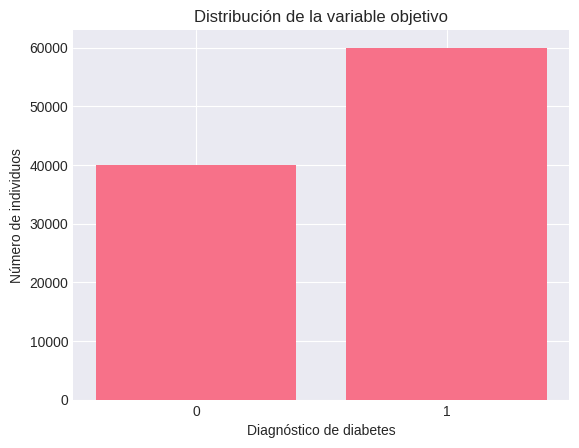

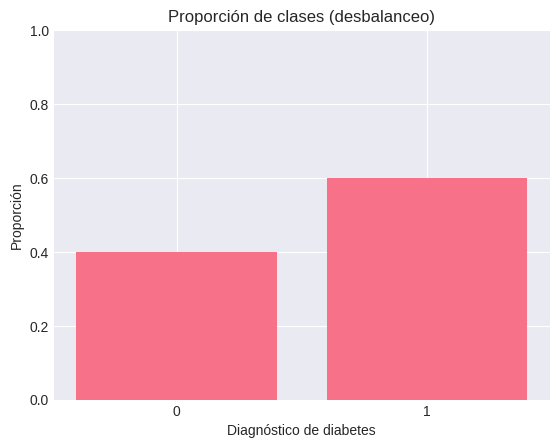

In [11]:
import matplotlib.pyplot as plt

# Conteo de clases
class_counts = df['y'].value_counts().sort_index()

plt.figure()
plt.bar(class_counts.index.astype(str), class_counts.values)
plt.xlabel('Diagnóstico de diabetes')
plt.ylabel('Número de individuos')
plt.title('Distribución de la variable objetivo')
plt.show()

class_props = df['y'].value_counts(normalize=True).sort_index()

plt.figure()
plt.bar(class_props.index.astype(str), class_props.values)
plt.xlabel('Diagnóstico de diabetes')
plt.ylabel('Proporción')
plt.title('Proporción de clases (desbalanceo)')
plt.ylim(0,1)
plt.show()

In [12]:
print("9. Análisis del tipo de datos:")
df.dtypes

9. Análisis del tipo de datos:


,0
age,int64
gender,object
ethnicity,object
education_level,object
income_level,object
employment_status,object
smoking_status,object
alcohol_consumption_per_week,int64
physical_activity_minutes_per_week,int64
diet_score,float64


In [13]:
lista_numericas=['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day',
                 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
                 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c',
                 'diabetes_risk_score']

In [14]:
lista_categoricas=['gender', 'ethnicity', 'education_level', 'income_level', 'employment_status', 'smoking_status', 'diabetes_stage']

In [15]:
categoricas_binarias = ['family_history_diabetes', 'hypertension_history', 'cardiovascular_history']

In [16]:
df_diabetes = df[['diabetes_stage', 'y']]

# Ver las primeras filas
print(df_diabetes.head())

# Ver el conteo de valores en cada columna
print("\nDistribución de diabetes_stage:")
print(df_diabetes['diabetes_stage'].value_counts())

print("\nDistribución de diagnosed_diabetes:")
print(df_diabetes['y'].value_counts())

stage_counts = df['diabetes_stage'].value_counts()
print("Distribución de diabetes_stage:")
print(stage_counts)

# Con porcentajes
stage_percentages = df['y'].value_counts(normalize=True) * 100
print("\nDistribución porcentual:")
print(stage_percentages.round(2))

  diabetes_stage  y
0         Type 2  1
1    No Diabetes  0
2         Type 2  1
3         Type 2  1
4         Type 2  1

Distribución de diabetes_stage:
diabetes_stage
Type 2          59774
Pre-Diabetes    31845
No Diabetes      7981
Gestational       278
Type 1            122
Name: count, dtype: int64

Distribución de diagnosed_diabetes:
y
1    59998
0    40002
Name: count, dtype: int64
Distribución de diabetes_stage:
diabetes_stage
Type 2          59774
Pre-Diabetes    31845
No Diabetes      7981
Gestational       278
Type 1            122
Name: count, dtype: int64

Distribución porcentual:
y
1    60.0
0    40.0
Name: proportion, dtype: float64


In [17]:
tabla = pd.crosstab(df['diabetes_stage'], df['y'])
print(tabla)

y                   0      1
diabetes_stage              
Gestational       120    158
No Diabetes      7981      0
Pre-Diabetes    31845      0
Type 1             56     66
Type 2              0  59774


In [ ]:
#df_raw['gender'] = df_raw['gender'].map({'Male': 0, 'Female': 1, 'male': 0, 'female': 1, 'other':2, 'Other':2})


8. Distribución de la variable objetivo (diagnosed_diabetes):


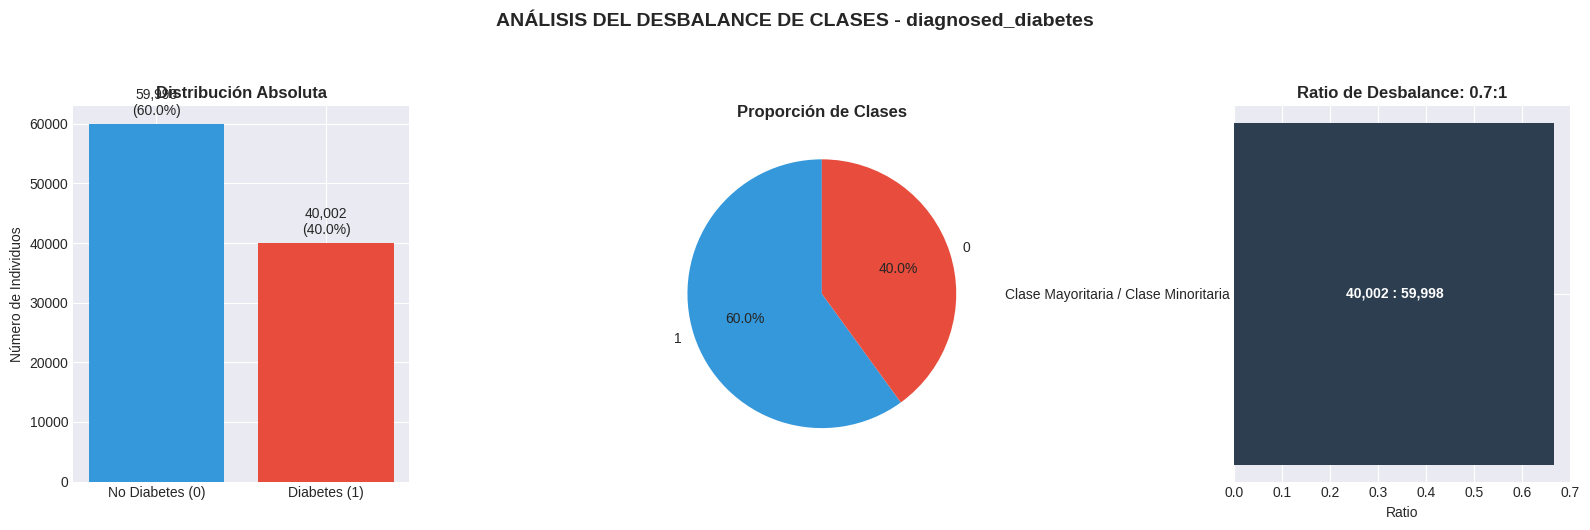


9. Resumen estadístico del desbalance:
   · Total individuos: 100,000
   · Clase 0 (No diabetes): 40,002 (40.00%)
   · Clase 1 (Diabetes): 59,998 (60.00%)
   · Ratio desbalance: 0.67:1


In [18]:
# 3.2 ANÁLISIS DE LA VARIABLE OBJETIVO
print("\n8. Distribución de la variable objetivo (diagnosed_diabetes):")
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Gráfico de barras
target_counts = df['y'].value_counts()
target_percent = target_counts / len(df) * 100
bars = axes[0].bar(['No Diabetes (0)', 'Diabetes (1)'], target_counts.values,
                   color=['#3498db', '#e74c3c'])
axes[0].set_title('Distribución Absoluta', fontweight='bold')
axes[0].set_ylabel('Número de Individuos')
for bar, count, pct in zip(bars, target_counts.values, target_percent.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000,
                f'{count:,}\n({pct:.1f}%)', ha='center', va='bottom')

# Gráfico de pastel
axes[1].pie(target_counts.values, labels=target_counts.index,
           autopct='%1.1f%%', startangle=90, colors=['#3498db', '#e74c3c'])
axes[1].set_title('Proporción de Clases', fontweight='bold')

# Gráfico de proporción
axes[2].barh(['Clase Mayoritaria / Clase Minoritaria'],
            [target_counts[0]/target_counts[1]], color='#2c3e50')
axes[2].set_xlabel('Ratio')
axes[2].set_title(f'Ratio de Desbalance: {target_counts[0]/target_counts[1]:.1f}:1', fontweight='bold')
axes[2].text(target_counts[0]/target_counts[1]/2, 0,
            f'{target_counts[0]:,} : {target_counts[1]:,}',
            ha='center', va='center', color='white', fontweight='bold')

plt.suptitle('ANÁLISIS DEL DESBALANCE DE CLASES - diagnosed_diabetes', fontsize=14, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

print(f"\n9. Resumen estadístico del desbalance:")
print(f"   · Total individuos: {len(df):,}")
print(f"   · Clase 0 (No diabetes): {target_counts[0]:,} ({target_percent[0]:.2f}%)")
print(f"   · Clase 1 (Diabetes): {target_counts[1]:,} ({target_percent[1]:.2f}%)")
print(f"   · Ratio desbalance: {target_counts[0]/target_counts[1]:.2f}:1")

ANÁLISIS UNIVARIANTE DE VARIABLES PREDICTORAS
--------------------------------------------------

9. Distribución de 24 variables numéricas:


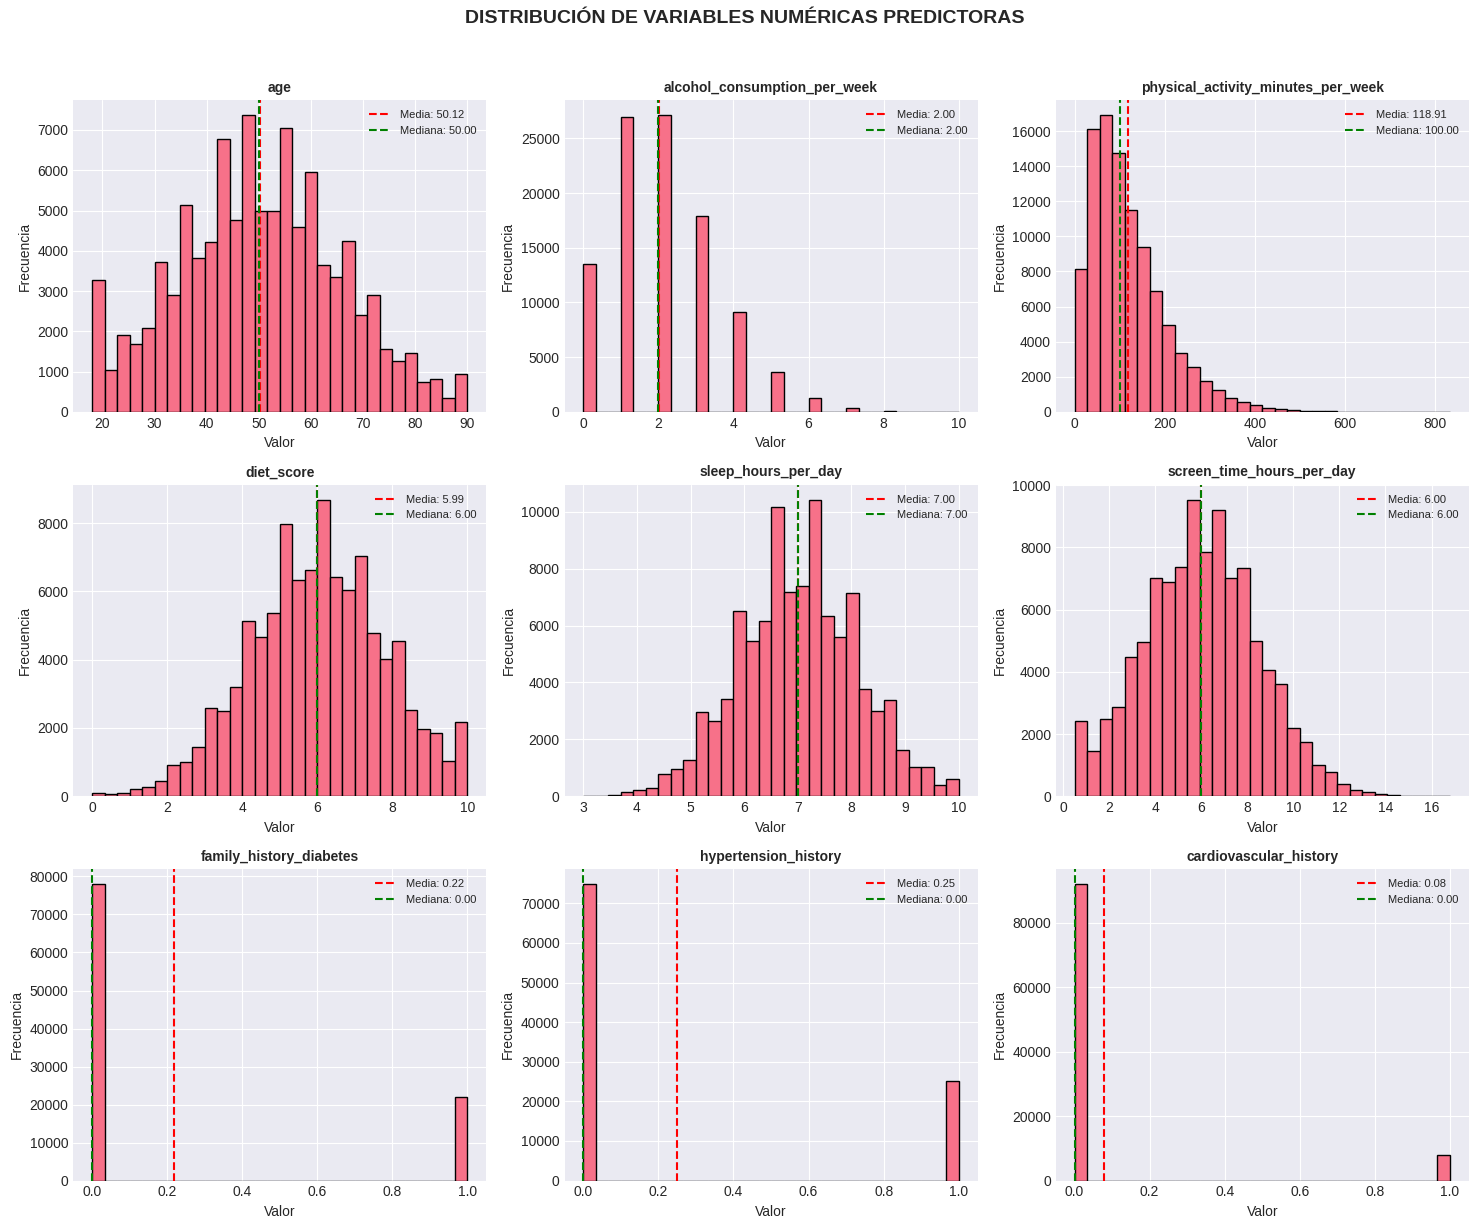

In [19]:
print("ANÁLISIS UNIVARIANTE DE VARIABLES PREDICTORAS")
print("-"*50)

# Identificamos variables numéricas (excluyendo la binaria que ya vimos)
numeric_cols = df_raw.select_dtypes(include=[np.number]).columns.tolist()

# Quitamos la variable objetivo para no graficarla aquí
if 'y' in numeric_cols:
    numeric_cols.remove('y')

print(f"\n9. Distribución de {len(numeric_cols)} variables numéricas:")

# Crear subplots para las principales variables numéricas (las primeras 9)
cols_to_plot = numeric_cols[:9]  # Puedes ajustar este número
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(cols_to_plot):
    ax = axes[i]
    df_raw[col].hist(bins=30, ax=ax, edgecolor='black')
    ax.set_title(f'{col}', fontsize=10, fontweight='bold')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')
    # Añadir líneas de media y mediana
    mean_val = df_raw[col].mean()
    median_val = df_raw[col].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Media: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=1.5, label=f'Mediana: {median_val:.2f}')
    ax.legend(fontsize=8)

# Ocultar ejes vacíos si hay menos de 9 variables
for i in range(len(cols_to_plot), 9):
    axes[i].set_visible(False)

plt.suptitle('DISTRIBUCIÓN DE VARIABLES NUMÉRICAS PREDICTORAS', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [20]:
# Copiamos solo columnas numéricas
df_num = df.select_dtypes(include=['int32','int64','float64']).copy()

# Codificamos la variable target
df_num['y'] = LabelEncoder().fit_transform(df['y'])

# Calculamos correlación absoluta
corr = df_num.corr().abs()

# Ordenamos por correlación con la variable target
corr_target = corr[['y']].sort_values(by='y', ascending=False)
print(corr_target)

                                           y
y                                   1.000000
hba1c                               0.679397
glucose_postprandial                0.629832
glucose_fasting                     0.510919
diabetes_risk_score                 0.277300
family_history_diabetes             0.197926
age                                 0.137713
physical_activity_minutes_per_week  0.100774
bmi                                 0.097057
systolic_bp                         0.095481
waist_to_hip_ratio                  0.078918
ldl_cholesterol                     0.067475
cholesterol_total                   0.058173
insulin_level                       0.057715
triglycerides                       0.056230
hdl_cholesterol                     0.051227
diet_score                          0.044298
diastolic_bp                        0.035619
cardiovascular_history              0.029793
hypertension_history                0.027524
heart_rate                          0.022785
screen_tim

In [21]:
print(f"Top 10 variables más correlacionadas:")
display(corr_target.head(10).style.format({'Correlación': '{:.3f}', 'Abs_Corr': '{:.3f}'}))

Top 10 variables más correlacionadas:


,y
y,1.000000
hba1c,0.679397
glucose_postprandial,0.629832
glucose_fasting,0.510919
diabetes_risk_score,0.277300
family_history_diabetes,0.197926
age,0.137713
physical_activity_minutes_per_week,0.100774
bmi,0.097057
systolic_bp,0.095481


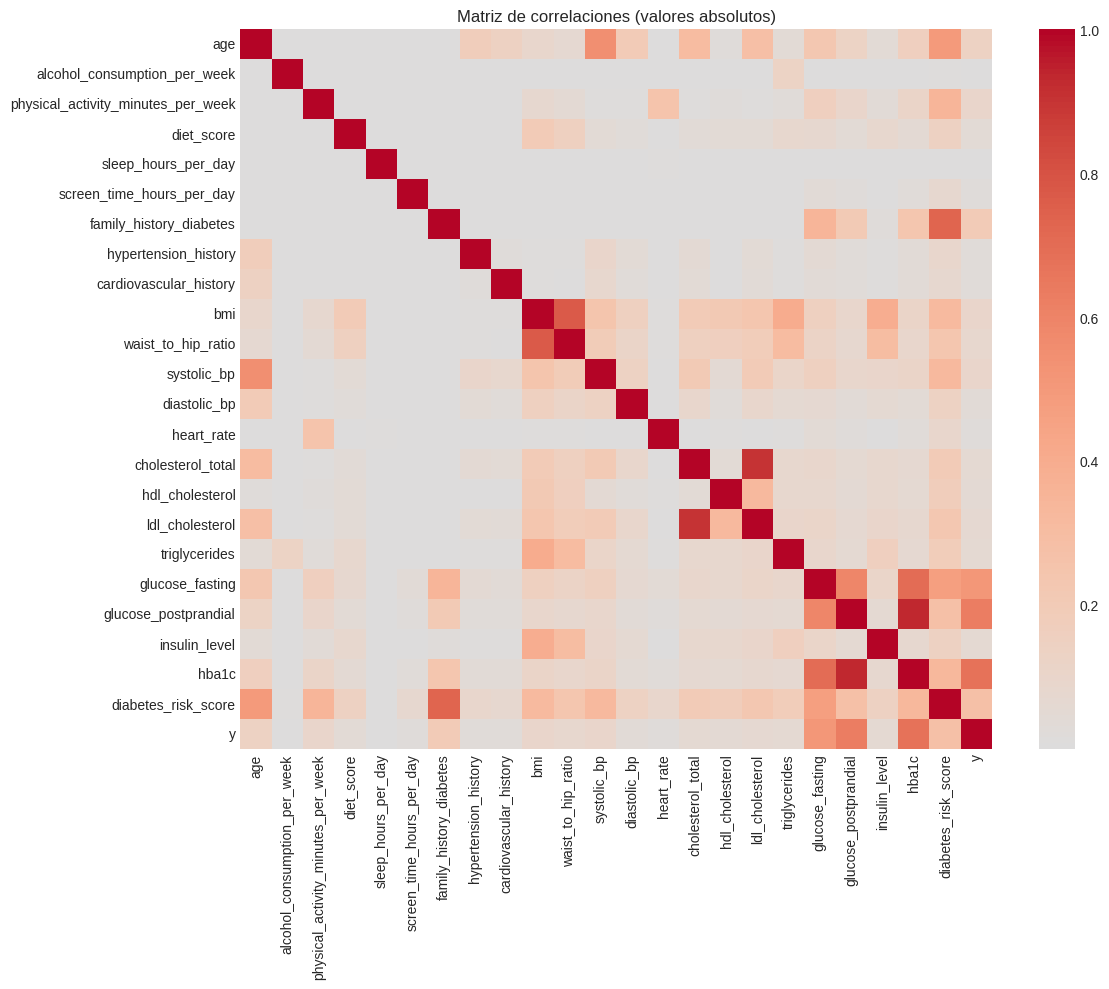

In [22]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    cmap='coolwarm',
    center=0,
    cbar=True
)

plt.title('Matriz de correlaciones (valores absolutos)')
plt.tight_layout()
plt.show()

Las variables con valores de correlación absoluta más elevados presentan una mayor relación lineal con la variable objetivo, lo que las convierte en candidatas relevantes para fases posteriores del proceso de modelización. No obstante, es importante destacar que la correlación lineal no implica causalidad, ni garantiza un mayor poder predictivo en modelos no lineales, por lo que este análisis se utiliza como una herramienta exploratoria y de apoyo a la selección inicial de variables.

La matriz muestra correlaciones fuertes y esperables entre variables metabólicas estrechamente relacionadas (glucosa en ayunas/postprandial, HbA1c, insulina y diabetes_risk_score), lo que indica posible redundancia de información. En cambio, las variables de estilo de vida presentan correlaciones bajas con el resto, aportando señales más independientes. Esto sugiere riesgo de multicolinealidad en el bloque clínico y la conveniencia de selección o regularización de variables para evitar sobreajuste.

VISUALIZACIONES PARA MEMORIA TFM - ANÁLISIS EXPLORATORIO

 SECCIÓN 1: DISTRIBUCIONES BÁSICAS

1.1 Histograma de Edad


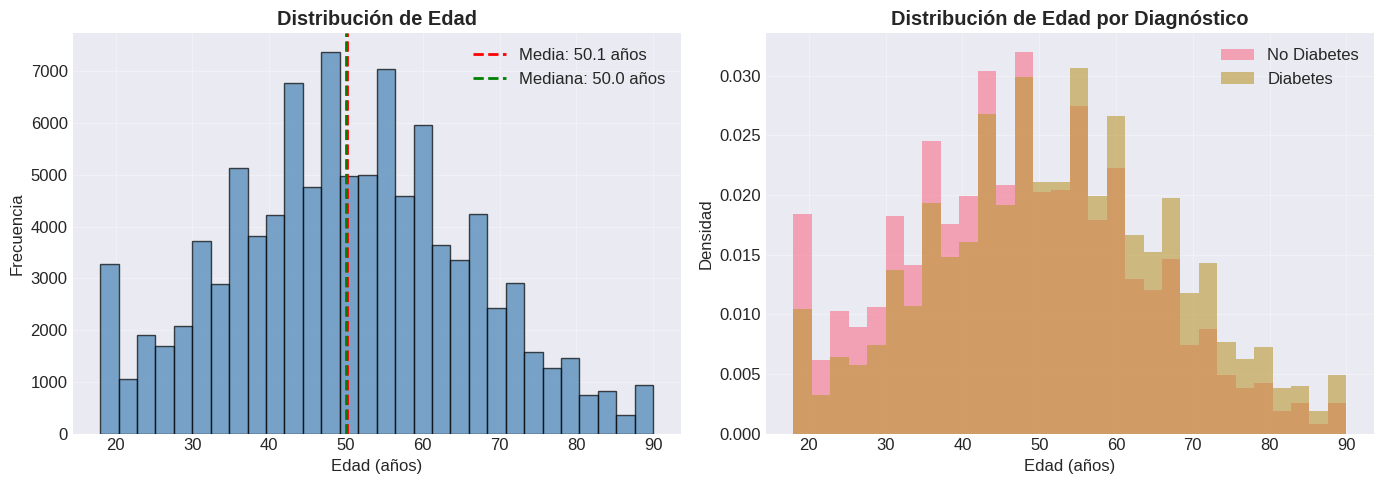

   · Edad promedio: 50.1 ± 15.6 años
   · Rango: 18 - 90 años
   · Edad media con diabetes: 51.9 años
   · Edad media sin diabetes: 47.5 años

1.2 Histograma de BMI


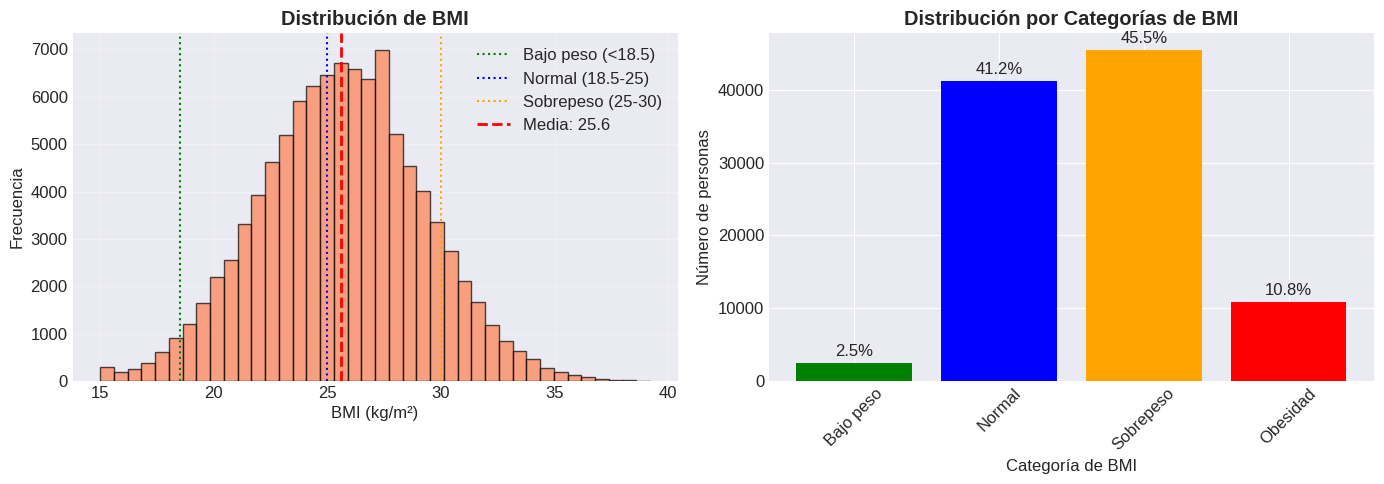

   · BMI promedio: 25.6 ± 3.6
   · % Sobrepeso/Obesidad (BMI ≥25): 57.4%


In [23]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("VISUALIZACIONES PARA MEMORIA TFM - ANÁLISIS EXPLORATORIO")

# 1. DISTRIBUCIONES BÁSICAS

print("\n SECCIÓN 1: DISTRIBUCIONES BÁSICAS")

# 1.1 Histograma de Edad
print("\n1.1 Histograma de Edad")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma simple
axes[0].hist(df['age'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Edad (años)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Edad', fontweight='bold')
axes[0].axvline(df['age'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Media: {df["age"].mean():.1f} años')
axes[0].axvline(df['age'].median(), color='green', linestyle='--', linewidth=2,
                label=f'Mediana: {df["age"].median():.1f} años')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Histograma por diagnóstico
for diagnosis in [0, 1]:
    subset = df[df['y'] == diagnosis]
    label = 'No Diabetes' if diagnosis == 0 else 'Diabetes'
    axes[1].hist(subset['age'], bins=30, alpha=0.6, label=label, density=True)

axes[1].set_xlabel('Edad (años)')
axes[1].set_ylabel('Densidad')
axes[1].set_title('Distribución de Edad por Diagnóstico', fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas para la memoria
print(f"   · Edad promedio: {df['age'].mean():.1f} ± {df['age'].std():.1f} años")
print(f"   · Rango: {df_raw['age'].min()} - {df['age'].max()} años")
print(f"   · Edad media con diabetes: {df[df['y']==1]['age'].mean():.1f} años")
print(f"   · Edad media sin diabetes: {df[df['y']==0]['age'].mean():.1f} años")

# 1.2 Histograma de BMI
print("\n1.2 Histograma de BMI")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de BMI
axes[0].hist(df['bmi'], bins=40, edgecolor='black', alpha=0.7, color='coral')
axes[0].set_xlabel('BMI (kg/m²)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de BMI', fontweight='bold')

# Líneas de referencia BMI
axes[0].axvline(18.5, color='green', linestyle=':', linewidth=1.5, label='Bajo peso (<18.5)')
axes[0].axvline(25, color='blue', linestyle=':', linewidth=1.5, label='Normal (18.5-25)')
axes[0].axvline(30, color='orange', linestyle=':', linewidth=1.5, label='Sobrepeso (25-30)')
axes[0].axvline(df['bmi'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Media: {df["bmi"].mean():.1f}')
axes[0].legend(loc='upper right')
axes[0].grid(alpha=0.3)

# Categorías de BMI
bmi_categories = pd.cut(df['bmi'],
                        bins=[0, 18.5, 25, 30, 40],
                        labels=['Bajo peso', 'Normal', 'Sobrepeso', 'Obesidad'])
category_counts = bmi_categories.value_counts().sort_index()

bars = axes[1].bar(category_counts.index, category_counts.values, color=['green', 'blue', 'orange', 'red'])
axes[1].set_xlabel('Categoría de BMI')
axes[1].set_ylabel('Número de personas')
axes[1].set_title('Distribución por Categorías de BMI', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

# Añadir porcentajes
for bar, count in zip(bars, category_counts.values):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, height + 500,
                f'{count/len(df)*100:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"   · BMI promedio: {df['bmi'].mean():.1f} ± {df['bmi'].std():.1f}")
print(f"   · % Sobrepeso/Obesidad (BMI ≥25): {(df['bmi'] >= 25).mean()*100:.1f}%")




1.3 Boxplot de BMI por Diagnóstico


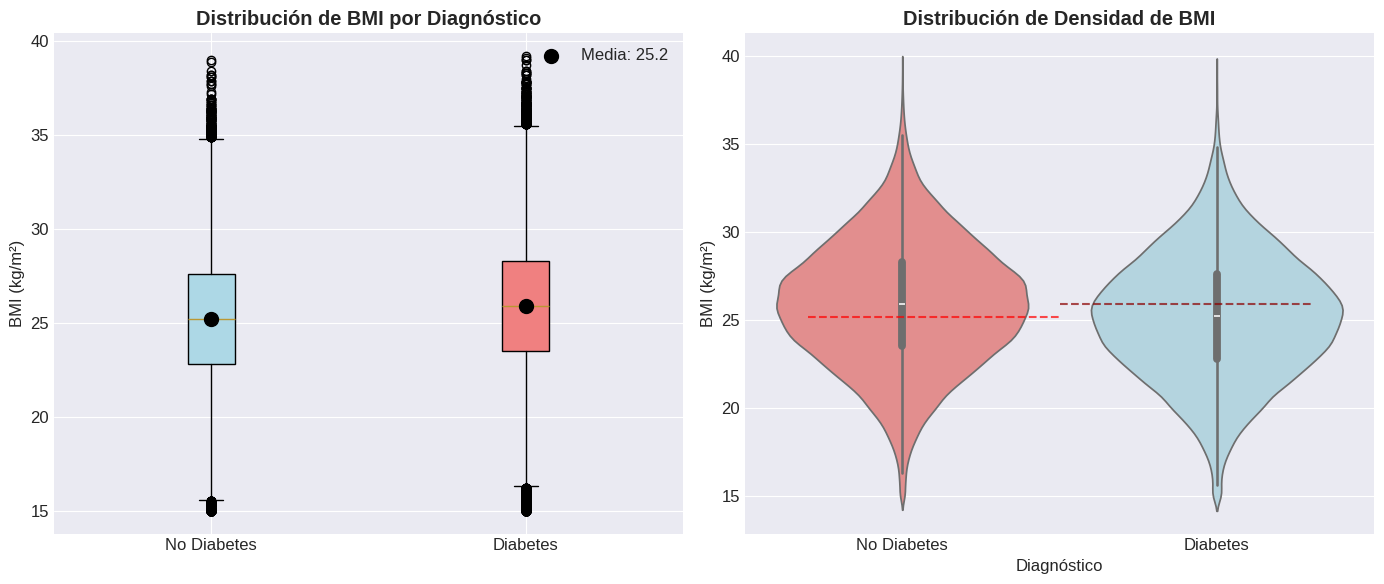

   · BMI con diabetes: 25.90 ± 3.58
   · BMI sin diabetes: 25.19 ± 3.56
   · Diferencia: 0.71 (p=0.0000)


In [24]:
from scipy import stats

# 1.3 Boxplot de BMI por diagnóstico
print("\n1.3 Boxplot de BMI por Diagnóstico")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot simple
box_data = [df[df['y']==0]['bmi'],
            df[df['y']==1]['bmi']]
bp = axes[0].boxplot(box_data, labels=['No Diabetes', 'Diabetes'], patch_artist=True)
axes[0].set_ylabel('BMI (kg/m²)')
axes[0].set_title('Distribución de BMI por Diagnóstico', fontweight='bold')

# Colorear las cajas
colors = ['lightblue', 'lightcoral']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Añadir puntos de media
for i, data in enumerate(box_data, 1):
    axes[0].scatter(i, data.mean(), color='black', s=100, zorder=3,
                   label=f'Media: {data.mean():.1f}' if i==1 else '')
axes[0].legend()

# Violin plot (alternativa más informativa)
df_temp = df.copy()
df_temp['diagnosed_diabetes_str'] = df_temp['y'].astype(str)

sns.violinplot(x='diagnosed_diabetes_str', y='bmi', data=df_temp, ax=axes[1],
               palette={'0': 'lightblue', '1': 'lightcoral'})
axes[1].set_xlabel('Diagnóstico')
axes[1].set_ylabel('BMI (kg/m²)')
axes[1].set_xticklabels(['No Diabetes', 'Diabetes'])
axes[1].set_title('Distribución de Densidad de BMI', fontweight='bold')

# Añadir media
for i in [0, 1]:
    mean_bmi = df[df['y']==i]['bmi'].mean()
    axes[1].axhline(mean_bmi, color='red' if i==0 else 'darkred',
                   linestyle='--', alpha=0.7, xmin=0.1+i*0.4, xmax=0.5+i*0.4)

plt.tight_layout()
plt.show()

# Test estadístico
bmi_diabetes = df[df['y']==1]['bmi']
bmi_no_diabetes = df[df['y']==0]['bmi']
t_stat, p_value = stats.ttest_ind(bmi_diabetes, bmi_no_diabetes)
print(f"   · BMI con diabetes: {bmi_diabetes.mean():.2f} ± {bmi_diabetes.std():.2f}")
print(f"   · BMI sin diabetes: {bmi_no_diabetes.mean():.2f} ± {bmi_no_diabetes.std():.2f}")
print(f"   · Diferencia: {bmi_diabetes.mean() - bmi_no_diabetes.mean():.2f} (p={p_value:.4f})")



1.4 Hábito Tabáquico vs Diabetes


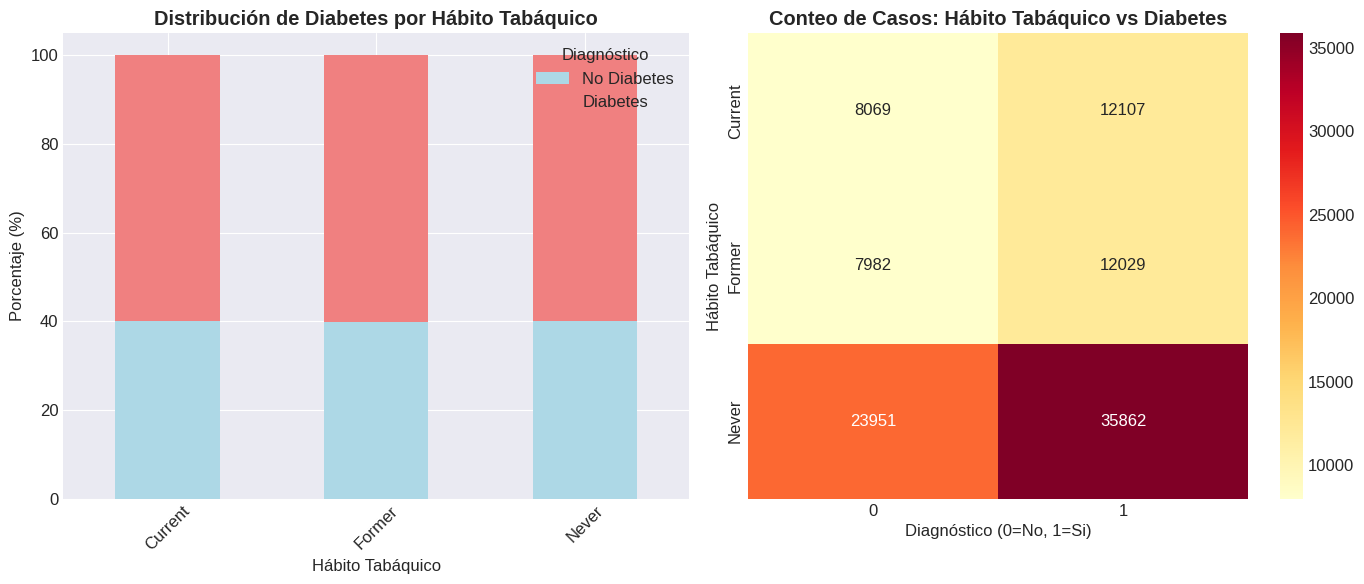

   · Prevalencia de diabetes por hábito tabáquico:
     Never: 60.0% (n=59813)
     Former: 60.1% (n=20011)
     Current: 60.0% (n=20176)


In [25]:
# 1.4 Hábito tabáquico vs Diabetes
print("\n1.4 Hábito Tabáquico vs Diabetes")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

smoking_col = 'smoking_status'

# Gráfico de barras apiladas
smoking_diabetes = pd.crosstab(df[smoking_col], df['y'])
smoking_diabetes_percent = smoking_diabetes.div(smoking_diabetes.sum(axis=1), axis=0) * 100

smoking_diabetes_percent.plot(kind='bar', stacked=True, ax=axes[0],
                             color=['lightblue', 'lightcoral'])
axes[0].set_xlabel('Hábito Tabáquico')
axes[0].set_ylabel('Porcentaje (%)')
axes[0].set_title('Distribución de Diabetes por Hábito Tabáquico', fontweight='bold')
axes[0].legend(['No Diabetes', 'Diabetes'], title='Diagnóstico')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de heatmap
smoking_counts = pd.crosstab(df[smoking_col], df['y'])
sns.heatmap(smoking_counts, annot=True, fmt='d', cmap='YlOrRd', ax=axes[1])
axes[1].set_xlabel('Diagnóstico (0=No, 1=Si)')
axes[1].set_ylabel('Hábito Tabáquico')
axes[1].set_title('Conteo de Casos: Hábito Tabáquico vs Diabetes', fontweight='bold')

plt.tight_layout()
plt.show()

# Estadísticas
print("   · Prevalencia de diabetes por hábito tabáquico:")
for status in df[smoking_col].unique():
    subset = df[df[smoking_col] == status]
    diabetes_rate = subset['y'].mean() * 100
    count = len(subset)
    print(f"     {status}: {diabetes_rate:.1f}% (n={count})")



🏃 SECCIÓN 2: VARIABLES DE ESTILO DE VIDA
--------------------------------------------------------------------------------

2.1 Actividad Física


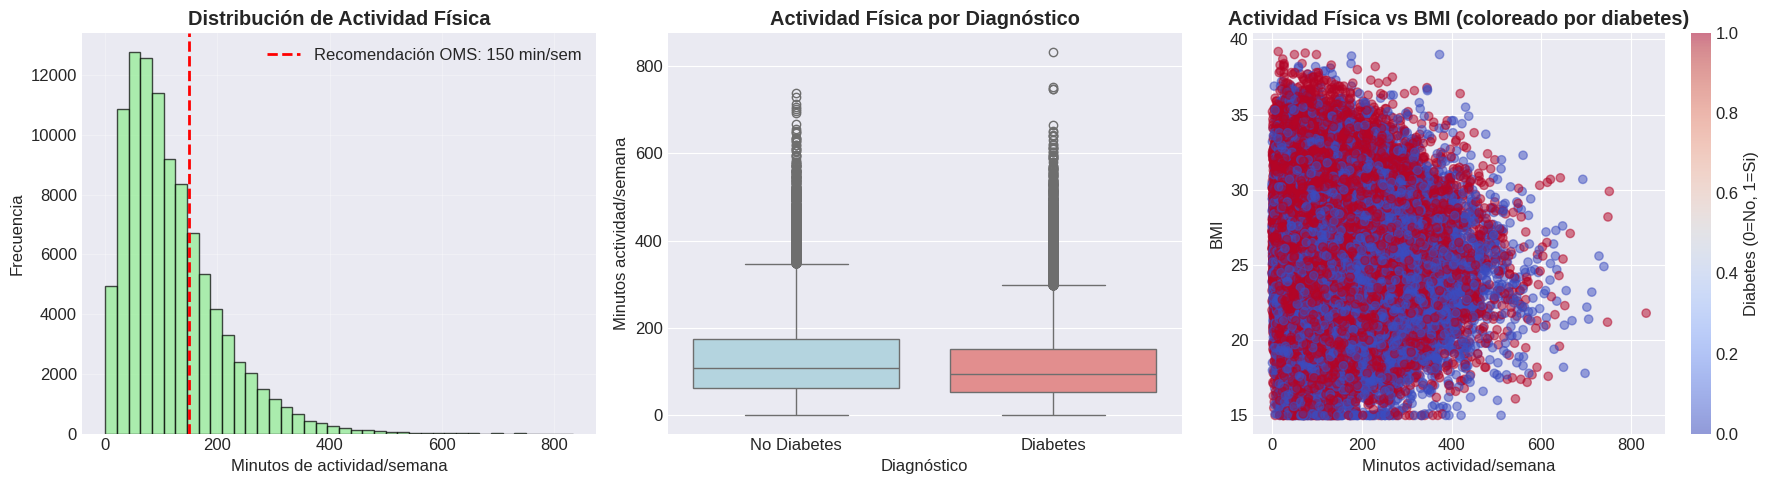

   · Actividad promedio: 119 min/semana
   · % que cumple recomendación OMS (≥150 min): 28.5%


In [26]:
# 2. VARIABLES DE ESTILO DE VIDA

print("\n\n🏃 SECCIÓN 2: VARIABLES DE ESTILO DE VIDA")
print("-"*80)

# 2.1 Actividad Física
print("\n2.1 Actividad Física")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histograma
axes[0].hist(df['physical_activity_minutes_per_week'], bins=40,
            edgecolor='black', alpha=0.7, color='lightgreen')
axes[0].set_xlabel('Minutos de actividad/semana')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Actividad Física', fontweight='bold')
axes[0].axvline(150, color='red', linestyle='--', linewidth=2,
               label='Recomendación OMS: 150 min/sem')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Boxplot por diagnóstico
sns.boxplot(x='y', y='physical_activity_minutes_per_week',
           data=df, ax=axes[1], palette=['lightblue', 'lightcoral'])
axes[1].set_xlabel('Diagnóstico')
axes[1].set_ylabel('Minutos actividad/semana')
axes[1].set_xticklabels(['No Diabetes', 'Diabetes'])
axes[1].set_title('Actividad Física por Diagnóstico', fontweight='bold')

# Scatter plot vs BMI
scatter = axes[2].scatter(df['physical_activity_minutes_per_week'],
                         df['bmi'],
                         c=df['y'],
                         alpha=0.5, cmap='coolwarm')
axes[2].set_xlabel('Minutos actividad/semana')
axes[2].set_ylabel('BMI')
axes[2].set_title('Actividad Física vs BMI (coloreado por diabetes)', fontweight='bold')
plt.colorbar(scatter, ax=axes[2], label='Diabetes (0=No, 1=Si)')

plt.tight_layout()
plt.show()

# Estadísticas
print(f"   · Actividad promedio: {df['physical_activity_minutes_per_week'].mean():.0f} min/semana")
print(f"   · % que cumple recomendación OMS (≥150 min): {(df['physical_activity_minutes_per_week'] >= 150).mean()*100:.1f}%")


2.2 Diet Score


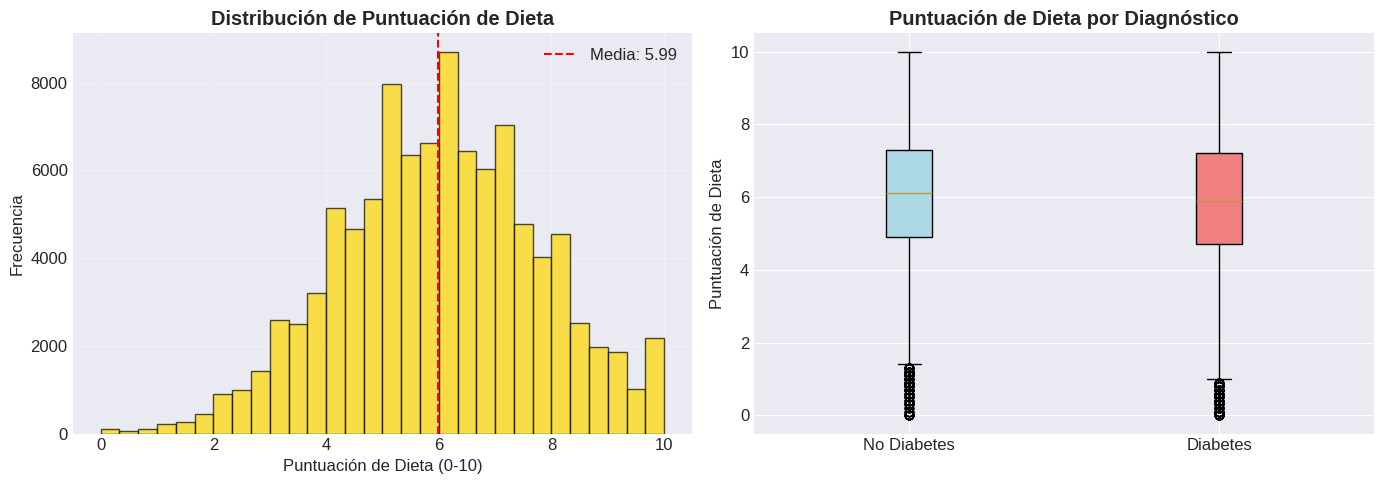

In [27]:
# 2.2 Diet Score
print("\n2.2 Diet Score")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribución
axes[0].hist(df['diet_score'], bins=30, edgecolor='black', alpha=0.7, color='gold')
axes[0].set_xlabel('Puntuación de Dieta (0-10)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Puntuación de Dieta', fontweight='bold')
axes[0].axvline(df['diet_score'].mean(), color='red', linestyle='--',
               label=f'Media: {df_raw["diet_score"].mean():.2f}')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Por diagnóstico
diet_by_diag = [df[df['y']==0]['diet_score'],
                df[df['y']==1]['diet_score']]
bp = axes[1].boxplot(diet_by_diag, labels=['No Diabetes', 'Diabetes'], patch_artist=True)
axes[1].set_ylabel('Puntuación de Dieta')
axes[1].set_title('Puntuación de Dieta por Diagnóstico', fontweight='bold')

# Colores
for patch, color in zip(bp['boxes'], ['lightblue', 'lightcoral']):
    patch.set_facecolor(color)

plt.tight_layout()
plt.show()


2.3 Horas de Sueño y Screen Time


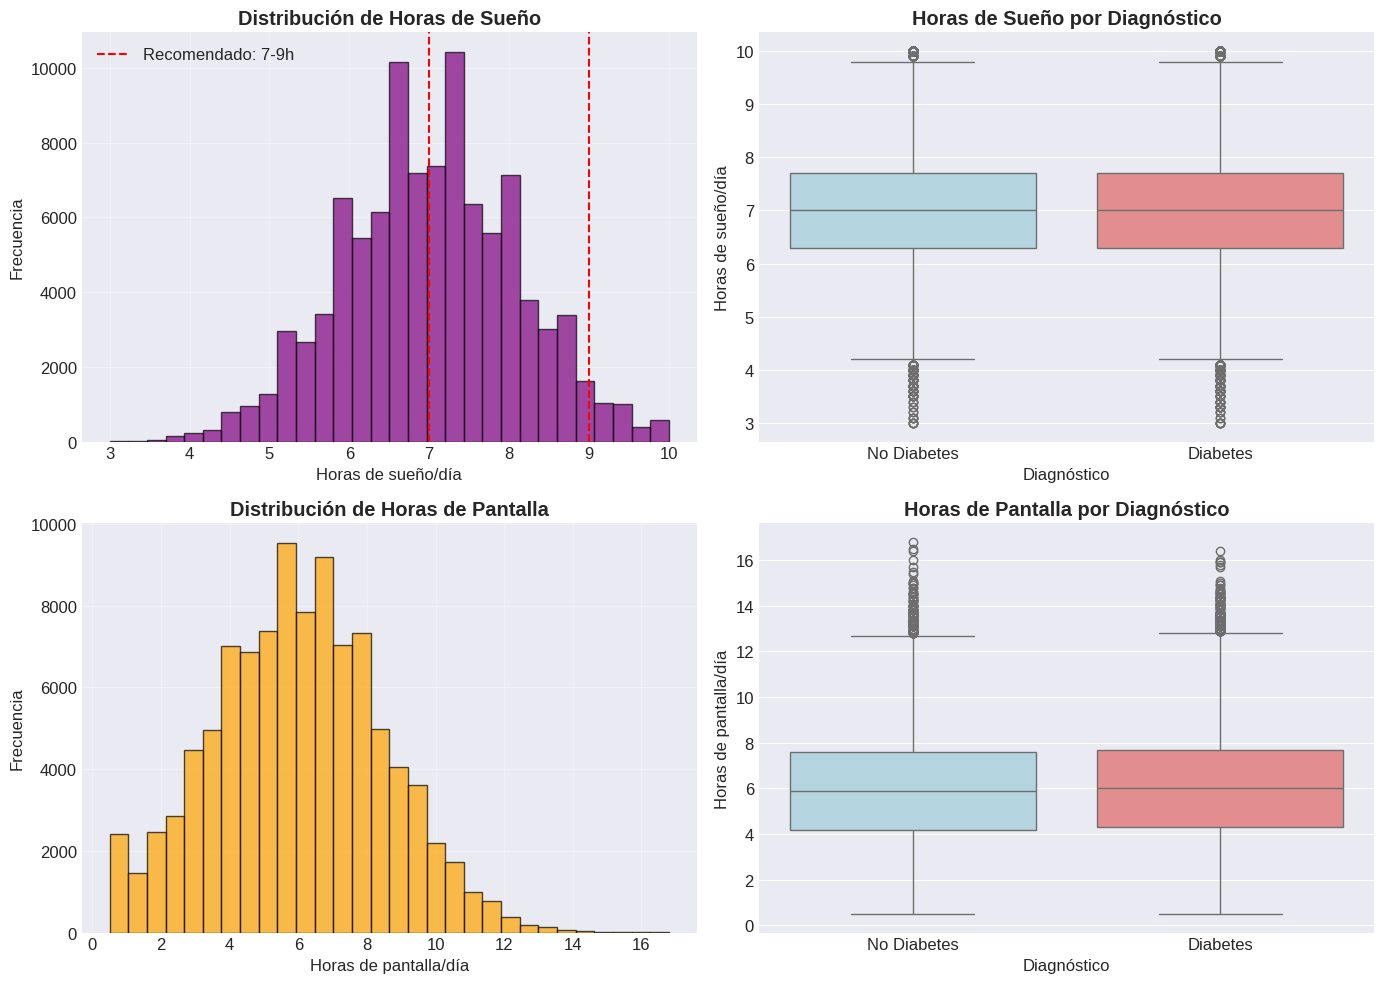

In [28]:
# 2.3 Horas de Sueño y Screen Time
print("\n2.3 Horas de Sueño y Screen Time")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Sueño - Distribución
axes[0,0].hist(df['sleep_hours_per_day'], bins=30, edgecolor='black',
              alpha=0.7, color='purple')
axes[0,0].set_xlabel('Horas de sueño/día')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].set_title('Distribución de Horas de Sueño', fontweight='bold')
axes[0,0].axvline(7, color='red', linestyle='--', label='Recomendado: 7-9h')
axes[0,0].axvline(9, color='red', linestyle='--')
axes[0,0].legend()
axes[0,0].grid(alpha=0.3)

# Sueño vs Diabetes
sns.boxplot(x='y', y='sleep_hours_per_day', data=df,
           ax=axes[0,1], palette=['lightblue', 'lightcoral'])
axes[0,1].set_xlabel('Diagnóstico')
axes[0,1].set_ylabel('Horas de sueño/día')
axes[0,1].set_xticklabels(['No Diabetes', 'Diabetes'])
axes[0,1].set_title('Horas de Sueño por Diagnóstico', fontweight='bold')

# Screen Time - Distribución
axes[1,0].hist(df['screen_time_hours_per_day'], bins=30, edgecolor='black',
              alpha=0.7, color='orange')
axes[1,0].set_xlabel('Horas de pantalla/día')
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].set_title('Distribución de Horas de Pantalla', fontweight='bold')
axes[1,0].grid(alpha=0.3)

# Screen Time vs Diabetes
sns.boxplot(x='y', y='screen_time_hours_per_day', data=df,
           ax=axes[1,1], palette=['lightblue', 'lightcoral'])
axes[1,1].set_xlabel('Diagnóstico')
axes[1,1].set_ylabel('Horas de pantalla/día')
axes[1,1].set_xticklabels(['No Diabetes', 'Diabetes'])
axes[1,1].set_title('Horas de Pantalla por Diagnóstico', fontweight='bold')

plt.tight_layout()
plt.show()

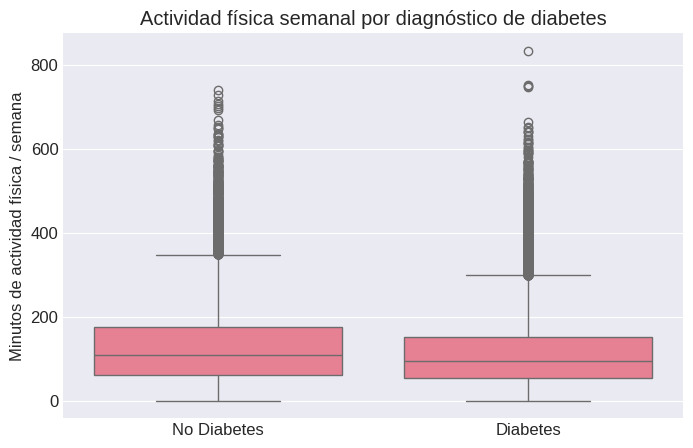

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x="y",
    y="physical_activity_minutes_per_week"
)
plt.xticks([0,1], ["No Diabetes", "Diabetes"])
plt.title("Actividad física semanal por diagnóstico de diabetes")
plt.ylabel("Minutos de actividad física / semana")
plt.xlabel("")
plt.show()

Las personas diagnosticadas con diabetes presentan, en promedio, menores niveles de actividad física semanal y una mayor concentración en valores bajos de actividad, lo que refuerza el papel del sedentarismo como factor de riesgo metabólico. Aunque existe solapamiento entre grupos, la actividad física muestra capacidad discriminativa a nivel poblacional.

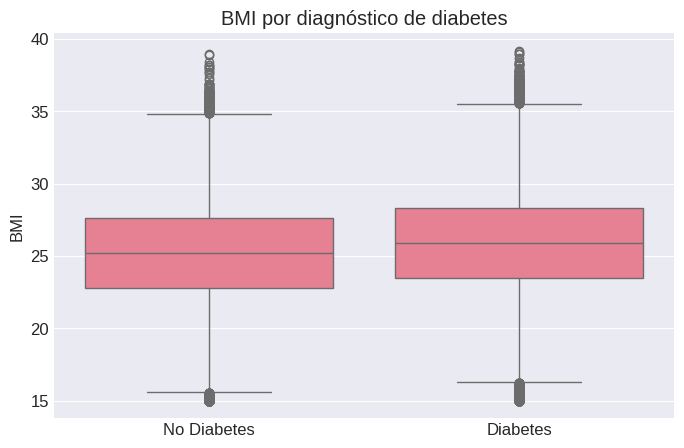

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x="y",
    y="bmi"
)
plt.xticks([0,1], ["No Diabetes", "Diabetes"])
plt.title("BMI por diagnóstico de diabetes")
plt.ylabel("BMI")
plt.xlabel("")
plt.show()

El BMI medio es significativamente mayor en el grupo con diagnóstico de diabetes. No obstante, la diferencia absoluta es moderada, lo que sugiere que el BMI actúa como un factor de riesgo relevante pero no suficiente por sí solo, reforzando la necesidad de modelos multivariantes.

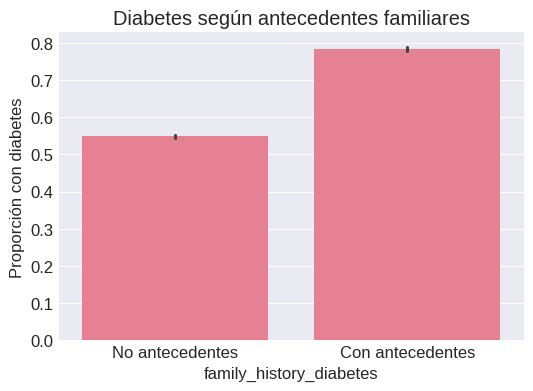

In [31]:
pd.crosstab(
    df["family_history_diabetes"],
    df["y"],
    normalize="index"
)

plt.figure(figsize=(6,4))
sns.barplot(
    data=df,
    x="family_history_diabetes",
    y="y",
    estimator=lambda x: sum(x)/len(x)
)
plt.xticks([0,1], ["No antecedentes", "Con antecedentes"])
plt.ylabel("Proporción con diabetes")
plt.title("Diabetes según antecedentes familiares")
plt.show()

La presencia de antecedentes familiares de diabetes se asocia con una mayor proporción de individuos diagnosticados, confirmando su relevancia como factor de riesgo no modificable y su potencial valor predictivo dentro del modelo.

smoking_status
Never      59.813
Current    20.176
Former     20.011
Name: proportion, dtype: float64


y                      0         1
smoking_status                    
Current         0.399931  0.600069
Former          0.398881  0.601119
Never           0.400431  0.599569


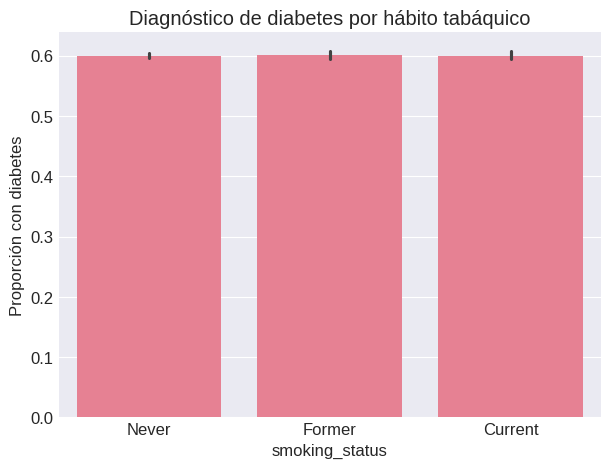

In [32]:
print(df["smoking_status"].value_counts(normalize=True) * 100)
print("\n")
print(pd.crosstab(
    df["smoking_status"],
    df["y"],
    normalize="index"
))

plt.figure(figsize=(7,5))
sns.barplot(
    data=df,
    x="smoking_status",
    y="y",
    estimator=lambda x: sum(x)/len(x)
)
plt.ylabel("Proporción con diabetes")
plt.title("Diagnóstico de diabetes por hábito tabáquico")
plt.show()

Aunque el tabaquismo es un factor de riesgo cardiovascular reconocido, en este conjunto de datos no se observa una diferencia relevante en la prevalencia de diabetes entre fumadores, exfumadores y no fumadores. Esto sugiere que, en este dataset, el hábito tabáquico no presenta capacidad discriminativa directa para el diagnóstico de diabetes, posiblemente debido a su efecto indirecto o a la falta de granularidad de la variable.

gender
Female    50.216
Male      47.771
Other      2.013
Name: proportion, dtype: float64


y              0         1
gender                    
Female  0.401545  0.598455
Male    0.399343  0.600657
Other   0.378043  0.621957


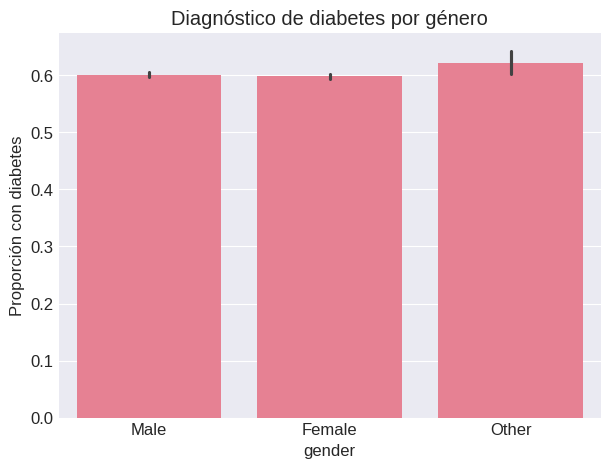

In [33]:
print(df["gender"].value_counts(normalize=True) * 100)
print("\n")
print(pd.crosstab(
    df["gender"],
    df["y"],
    normalize="index"
))

plt.figure(figsize=(7,5))
sns.barplot(
    data=df,
    x="gender",
    y="y",
    estimator=lambda x: sum(x)/len(x)
)
plt.ylabel("Proporción con diabetes")
plt.title("Diagnóstico de diabetes por género")
plt.show()

income_level
Middle          35.152
Lower-Middle    25.150
Upper-Middle    19.866
Low             14.830
High             5.002
Name: proportion, dtype: float64


y                    0         1
income_level                    
High          0.392843  0.607157
Low           0.399461  0.600539
Lower-Middle  0.396143  0.603857
Middle        0.403306  0.596694
Upper-Middle  0.401339  0.598661


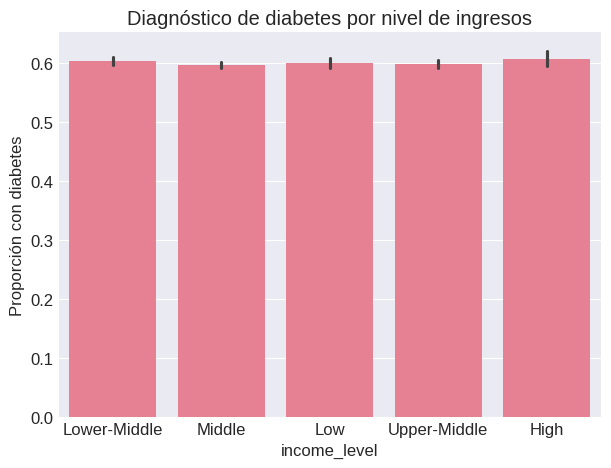

In [34]:
print(df["income_level"].value_counts(normalize=True) * 100)
print("\n")
print(pd.crosstab(
    df["income_level"],
    df["y"],
    normalize="index"
))

plt.figure(figsize=(7,5))
sns.barplot(
    data=df,
    x="income_level",
    y="y",
    estimator=lambda x: sum(x)/len(x)
)
plt.ylabel("Proporción con diabetes")
plt.title("Diagnóstico de diabetes por nivel de ingresos")
plt.show()

employment_status
Employed      60.175
Retired       21.761
Unemployed    11.918
Student        6.146
Name: proportion, dtype: float64


y                         0         1
employment_status                    
Employed           0.398488  0.601512
Retired            0.404715  0.595285
Student            0.402701  0.597299
Unemployed         0.397802  0.602198


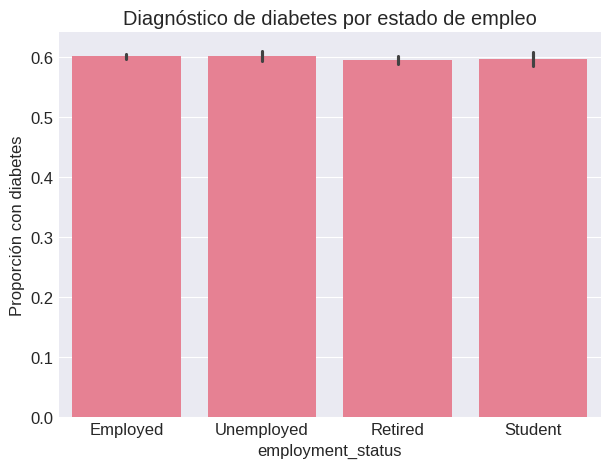

In [35]:
print(df["employment_status"].value_counts(normalize=True) * 100)
print("\n")
print(pd.crosstab(
    df["employment_status"],
    df["y"],
    normalize="index"
))

plt.figure(figsize=(7,5))
sns.barplot(
    data=df,
    x="employment_status",
    y="y",
    estimator=lambda x: sum(x)/len(x)
)
plt.ylabel("Proporción con diabetes")
plt.title("Diagnóstico de diabetes por estado de empleo")
plt.show()

ethnicity
White       44.997
Hispanic    20.103
Black       17.986
Asian       11.865
Other        5.049
Name: proportion, dtype: float64


y                 0         1
ethnicity                    
Asian      0.399241  0.600759
Black      0.398588  0.601412
Hispanic   0.406059  0.593941
Other      0.392355  0.607645
White      0.398960  0.601040


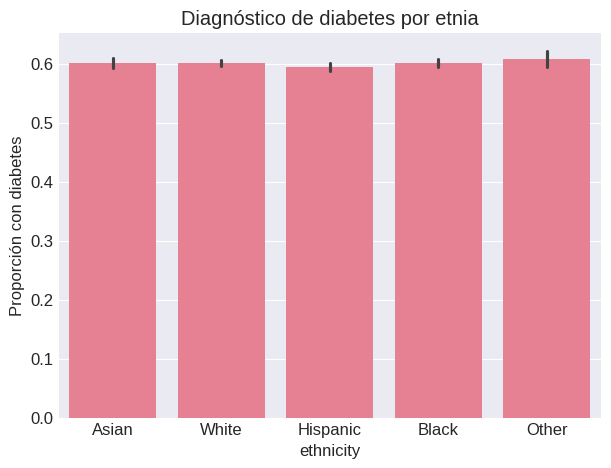

In [36]:
print(df["ethnicity"].value_counts(normalize=True) * 100)
print("\n")
print(pd.crosstab(
    df["ethnicity"],
    df["y"],
    normalize="index"
))

plt.figure(figsize=(7,5))
sns.barplot(
    data=df,
    x="ethnicity",
    y="y",
    estimator=lambda x: sum(x)/len(x)
)
plt.ylabel("Proporción con diabetes")
plt.title("Diagnóstico de diabetes por etnia")
plt.show()

La variable objetivo presenta un desbalanceo moderado, con aproximadamente un 60% de individuos sin diabetes frente a un 40% diagnosticados. Aunque no se trata de un desbalanceo severo, esta asimetría puede influir en el rendimiento de los modelos predictivos y en la interpretación de métricas como la accuracy, por lo que se tendrá en cuenta en las fases de modelado y evaluación.

MODELADO

Dividimos el conjunto de datos en X e y.

Conversión a variable
numérica

Categóricas:

Una opción es transformar las variables a dummies, lo cual si fuesemos a elegir un modelo de regresión seria una opción muy candidata. Sin embargo, con la idea de probar con un modelo randomforest y, posteriormente, replicar el proceso para productivizar este modelo, haremos un LabelEncoder.

In [49]:
lista_categoricas

['gender',
 'ethnicity',
 'education_level',
 'income_level',
 'employment_status',
 'smoking_status',
 'diabetes_stage']

In [50]:
df[lista_categoricas].nunique().sort_values(ascending=False)

,0
ethnicity,5
diabetes_stage,5
income_level,5
employment_status,4
education_level,4
gender,3
smoking_status,3


In [51]:
X = df
y = df['y']

In [52]:
def plot_target_vs_features(var, target, df):
    proporcion = pd.DataFrame()
    proporcion['%'] = df[target].groupby(df[var]).mean() * 100
    proporcion['Conteo'] = df[target].groupby(df[var]).count()
    proporcion = proporcion.round(3)
    proporcion_filtered = proporcion[(proporcion['%'] > 0) & (proporcion['Conteo'] > 10)]

    if len(proporcion_filtered) < 100 and len(proporcion_filtered) > 1:
        fig = px.bar(proporcion_filtered, x=proporcion_filtered.index, y='Conteo', title=f'Distribución de {var}', labels={'x': var, 'Conteo': 'Cantidad'}, template='plotly_white')
        fig.add_trace(go.Scatter(x=proporcion_filtered.index, y=proporcion_filtered['%'], mode='lines+markers', name='%', yaxis='y2', line=dict(color='green')))

        fig.update_layout(
            yaxis2=dict(title='%', overlaying='y', side='right')
        )
    elif len(proporcion_filtered) >= 100:
        df_filtered = df[[var, target]].dropna()
        df_filtered['bin'] = pd.qcut(df_filtered[var], q=20, duplicates='drop')
        bin_means = df_filtered.groupby('bin')[target].mean() * 100
        bin_counts = df_filtered.groupby('bin')[target].count()

        fig = go.Figure()
        fig.add_trace(go.Bar(x=bin_means.index.astype(str), y=bin_counts, name='Conteo', yaxis='y', marker_color='blue'))
        fig.add_trace(go.Scatter(x=bin_means.index.astype(str), y=bin_means, mode='lines+markers', name='%', yaxis='y2', line=dict(color='green')))

        fig.update_layout(
            title=f'Relación entre {var} y {target}',
            xaxis_title=f'Binned {var}',
            yaxis=dict(title='Conteo'),
            yaxis2=dict(title='%', overlaying='y', side='right'),
            template='plotly_white'
        )
    else:
        proporcion_filtered.reset_index(inplace=True)
        fig = px.scatter(proporcion_filtered, x=var, y='%', trendline='ols', title=f'Relación entre {var} y % Depósitos', template='plotly_white')

    fig.show()


Vamos a eliminar las variables que van a sobreajustar el modelo. Para ello, miramos tanto la correlación con la variable objetivo como el significado que tiene cada una:

In [53]:
X = X.drop(["diabetes_stage", "diabetes_risk_score"], axis=1)

In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [58]:
label_encoders = {}

categorical_cols = X.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = X[col].astype(str) # Solo la columna actual
    X[col + "_encoded"] = le.fit_transform(X[col])

    # Guardamos el encoder para usarlo en test
    label_encoders[col] = le

In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [61]:
# columnas de tipo object, excepto la target 'y'
cols_to_drop = [col for col in X.select_dtypes(include="object").columns if col != "y"]

# borramos esas columnas
X = X.drop(columns=cols_to_drop)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   alcohol_consumption_per_week        100000 non-null  int64  
 2   physical_activity_minutes_per_week  100000 non-null  int64  
 3   diet_score                          100000 non-null  float64
 4   sleep_hours_per_day                 100000 non-null  float64
 5   screen_time_hours_per_day           100000 non-null  float64
 6   family_history_diabetes             100000 non-null  int64  
 7   hypertension_history                100000 non-null  int64  
 8   cardiovascular_history              100000 non-null  int64  
 9   bmi                                 100000 non-null  float64
 10  waist_to_hip_ratio                  100000 non-null  float64
 11  systolic_bp                

In [62]:
# Copiamos solo columnas numéricas
df_num_total = X.select_dtypes(include=['int32','int64','float64']).copy()

# Calculamos correlación absoluta
corr = df_num_total.corr().abs()

# Ordenamos por correlación con la variable target
corr_target = corr[['y']].sort_values(by='y', ascending=False)
print(corr_target)

                                           y
y                                   1.000000
hba1c                               0.679397
glucose_postprandial                0.629832
glucose_fasting                     0.510919
family_history_diabetes             0.197926
age                                 0.137713
physical_activity_minutes_per_week  0.100774
bmi                                 0.097057
systolic_bp                         0.095481
waist_to_hip_ratio                  0.078918
ldl_cholesterol                     0.067475
cholesterol_total                   0.058173
insulin_level                       0.057715
triglycerides                       0.056230
hdl_cholesterol                     0.051227
diet_score                          0.044298
diastolic_bp                        0.035619
cardiovascular_history              0.029793
hypertension_history                0.027524
heart_rate                          0.022785
screen_time_hours_per_day           0.018127
gender_enc

In [63]:
for i in X.columns:
    plot_target_vs_features (i, 'y', X)

In [64]:
X = X.drop(columns=['y'], axis=1)

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [66]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier()

model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      8000
           1       1.00      0.87      0.93     12000

    accuracy                           0.92     20000
   macro avg       0.92      0.93      0.92     20000
weighted avg       0.93      0.92      0.92     20000



In [69]:
def saca_metricas(y1, y2):
    print('Matriz de Confusión')
    print(confusion_matrix(y1, y2))
    print('Accuracy:', accuracy_score(y1, y2))
    print('Precision:', precision_score(y1, y2))
    print('Recall:', recall_score(y1, y2))
    print('F1 Score:', f1_score(y1, y2))

    # Cálculo de la curva ROC y AUC
    false_positive_rate, recall, _ = roc_curve(y1, y2)
    roc_auc = auc(false_positive_rate, recall)
    print('AUC:', roc_auc)

    # Crear gráfico interactivo con Plotly
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=false_positive_rate, y=recall, mode='lines', name='Curva ROC', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Línea base', line=dict(color='red', dash='dash')))

    fig.update_layout(
        title=f'Curva ROC (AUC = {roc_auc:.2f})',
        xaxis_title='False Positive Rate',
        yaxis_title='Recall',
        template='plotly_white'
    )

    fig.show()

In [70]:
saca_metricas(y_test, y_pred)

Matriz de Confusión
[[ 7999     1]
 [ 1601 10399]]
Accuracy: 0.9199
Precision: 0.9999038461538462
Recall: 0.8665833333333334
F1 Score: 0.9284821428571428
AUC: 0.9332291666666667


El presente modelo no cumple con los objetivos del producto que queremos desarrollar. Buscamos un acercamiento más accesible a un usuario, un test "fácil de responder". Hay variables clínicas que por un lado no estarían disponibles en un contexto de uso real orientado a usuarios finales, y por otro, constituyen una práctica clínica o un criterio diagnóstico de la diabetes. Es por ese motivo que debemos eliminarlas del modelo.

In [71]:
X = X.drop(columns=['hba1c'], axis=1)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [73]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()

model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      8000
           1       0.90      0.83      0.86     12000

    accuracy                           0.84     20000
   macro avg       0.84      0.85      0.84     20000
weighted avg       0.85      0.84      0.84     20000



In [75]:
saca_metricas(y_test, y_pred)

Matriz de Confusión
[[6886 1114]
 [2045 9955]]
Accuracy: 0.84205
Precision: 0.8993585689764206
Recall: 0.8295833333333333
F1 Score: 0.863062984958169
AUC: 0.8451666666666667


Haremos lo mismo con variables que sirven para un diagnóstico claro, no una prevención.

In [76]:
X = X.drop(columns=['glucose_postprandial', 'insulin_level'], axis=1)

La glucosa en ayunas se mantiene por tratarse de una variable ampliamente disponible en analíticas rutinarias y clínicamente relevante en la detección temprana de alteraciones glucémicas.

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

model_base_prod = RandomForestClassifier()

model_base_prod.fit(X_train,y_train)
y_pred = model_base_prod.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.64      0.65      8000
           1       0.77      0.78      0.77     12000

    accuracy                           0.72     20000
   macro avg       0.71      0.71      0.71     20000
weighted avg       0.72      0.72      0.72     20000



In [78]:
saca_metricas(y_test, y_pred)

Matriz de Confusión
[[5125 2875]
 [2632 9368]]
Accuracy: 0.72465
Precision: 0.7651719349832558
Recall: 0.7806666666666666
F1 Score: 0.772841645010931
AUC: 0.7106458333333333


In [79]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   alcohol_consumption_per_week        100000 non-null  int64  
 2   physical_activity_minutes_per_week  100000 non-null  int64  
 3   diet_score                          100000 non-null  float64
 4   sleep_hours_per_day                 100000 non-null  float64
 5   screen_time_hours_per_day           100000 non-null  float64
 6   family_history_diabetes             100000 non-null  int64  
 7   hypertension_history                100000 non-null  int64  
 8   cardiovascular_history              100000 non-null  int64  
 9   bmi                                 100000 non-null  float64
 10  waist_to_hip_ratio                  100000 non-null  float64
 11  systolic_bp                

In [80]:
def plot_feature_importance(model, X):
    feat_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=["Importance"])
    feat_importances.sort_values(by='Importance', ascending=False, inplace=True)

    fig = px.bar(feat_importances, x=feat_importances.index, y='Importance', title='Feature Importances', labels={'x': 'Features', 'Importance': 'Importance'}, template='plotly_white')
    fig.show()

    return feat_importances

In [81]:
plot_feature_importance(model_base_prod, X)

,Importance
glucose_fasting,0.258937
physical_activity_minutes_per_week,0.052866
bmi,0.047499
triglycerides,0.047448
age,0.046127
screen_time_hours_per_day,0.045885
diet_score,0.044126
cholesterol_total,0.044086
sleep_hours_per_day,0.042426
systolic_bp,0.041818


Algunas variables con correlación moderada con la variable objetivo presentan una importancia cercana a cero en modelos basados en árboles. Esto se debe a que los modelos ensemble priorizan variables que aportan mayor ganancia de información condicional, penalizando aquellas cuya señal ya está contenida en otras variables correlacionadas, especialmente cuando se trata de variables binarias frente a continuas.

FEATURE ENGINEERING

In [ ]:
# Diet score
X['poor_diet'] = X['diet_score'].apply(lambda x: 1 if x<=4 else 0)
X['medium_diet'] = X['diet_score'].apply(lambda x: 1 if x>4 and x<=6 else 0)
X['healthy_diet'] = X['diet_score'].apply(lambda x: 1 if x>6 else 0)

# Sleep
X['non_optimal_sleep'] = (
    (X['sleep_hours_per_day'] < 6) |
    (X['sleep_hours_per_day'] > 8)
).astype(int)

# Physical activity
X['meets_pa_guidelines'] = (X['physical_activity_minutes_per_week'] >= 150).astype(int)
X['sedentary'] = (X['physical_activity_minutes_per_week'] < 150).astype(int)


# Screen time
X['screen_time_category'] = pd.cut(
    X['screen_time_hours_per_day'],
    bins=[0, 4, 7, 24],
    labels=[1, 2, 3]
).astype(int)
#leyenda Screen Time -> 1: 0-4; 2: 4-7; 3: 7-24

# Age groups
X['age_group'] = pd.cut(
    X['age'],
    bins=[0, 35, 50, 65, 100],
    labels=[1, 2, 3, 4]
).astype(int)
# leyenda age groups -> 1: 0-35; 2: 35-50; 3: 50-65; 4: +65


# BMI
X['obesity'] = (X['bmi'] >= 30).astype(int)
X['overweight_or_obese'] = (X['bmi'] >= 25).astype(int)

# Obesidad central
X['central_obesity'] = (X['waist_to_hip_ratio'] > 0.85).astype(int)

# Sendentarismo Digital (más de 6 horas al día pantallas + menos de 150  minutos de actividad fisica semanales)
X['high_screen_and_sedentary'] = (
    (X['screen_time_hours_per_day'] > 6) &
    (X['physical_activity_minutes_per_week'] < 150)
).astype(int)

# Dislipidemia
X['dyslipidemia'] = (
    (X['ldl_cholesterol'] > 130) |
    (X['triglycerides'] > 150) |
    (X['hdl_cholesterol'] < 40)
).astype(int)

# Riesgo cardiovascular agregado
X['cardio_risk'] = (
    X['hypertension_history'] +
    X['dyslipidemia'] +
    X['family_history_diabetes']
)

X['lifestyle'] = X['alcohol_comsumption_per_week']

In [83]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 39 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   alcohol_consumption_per_week        100000 non-null  int64  
 2   physical_activity_minutes_per_week  100000 non-null  int64  
 3   diet_score                          100000 non-null  float64
 4   sleep_hours_per_day                 100000 non-null  float64
 5   screen_time_hours_per_day           100000 non-null  float64
 6   family_history_diabetes             100000 non-null  int64  
 7   hypertension_history                100000 non-null  int64  
 8   cardiovascular_history              100000 non-null  int64  
 9   bmi                                 100000 non-null  float64
 10  waist_to_hip_ratio                  100000 non-null  float64
 11  systolic_bp                

In [84]:
X.head(50)

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,meets_pa_guidelines,sedentary,screen_time_category,age_group,obesity,overweight_or_obese,central_obesity,high_screen_and_sedentary,dyslipidemia,cardio_risk
0,58,0,215,5.7,7.9,7.9,0,0,0,30.5,...,1,0,3,3,1,1,1,0,1,1
1,48,1,143,6.7,6.5,8.7,0,0,0,23.1,...,0,1,3,2,0,0,0,1,0,0
2,60,1,57,6.4,10.0,8.1,1,0,0,22.2,...,0,1,3,3,0,0,0,1,0,1
3,74,0,49,3.4,6.6,5.2,0,0,0,26.8,...,0,1,2,4,0,1,1,0,0,0
4,46,1,109,7.2,7.4,5.0,0,0,0,21.2,...,0,1,2,2,0,0,0,0,1,1
5,46,2,124,9.0,6.2,5.4,0,0,0,26.1,...,0,1,2,2,0,1,0,0,1,1
6,75,0,53,9.2,7.8,8.0,0,1,0,25.1,...,0,1,3,4,0,1,1,1,1,2
7,62,1,75,4.1,9.0,12.9,0,1,1,23.9,...,0,1,3,3,0,0,1,1,1,2
8,42,1,114,6.7,8.5,8.5,0,0,1,24.7,...,0,1,3,2,0,0,0,1,1,1
9,59,3,86,8.2,5.3,7.4,0,0,0,26.7,...,0,1,3,3,0,1,0,1,0,0


In [85]:
X.dtypes

,0
age,int64
alcohol_consumption_per_week,int64
physical_activity_minutes_per_week,int64
diet_score,float64
sleep_hours_per_day,float64
screen_time_hours_per_day,float64
family_history_diabetes,int64
hypertension_history,int64
cardiovascular_history,int64
bmi,float64


seguir con transformaciones (variables continuas)

MUESTREO ESTRATIFICADO

In [86]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

model_all_fe = RandomForestClassifier()

model_all_fe.fit(X_train,y_train)
y_pred = model_all_fe.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.63      0.64      8000
           1       0.76      0.78      0.77     12000

    accuracy                           0.72     20000
   macro avg       0.71      0.71      0.71     20000
weighted avg       0.72      0.72      0.72     20000



In [88]:
saca_metricas(y_test, y_pred)

Matriz de Confusión
[[5052 2948]
 [2644 9356]]
Accuracy: 0.7204
Precision: 0.7604031209362809
Recall: 0.7796666666666666
F1 Score: 0.7699144173798552
AUC: 0.7055833333333332


In [91]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 39 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   alcohol_consumption_per_week        100000 non-null  int64  
 2   physical_activity_minutes_per_week  100000 non-null  int64  
 3   diet_score                          100000 non-null  float64
 4   sleep_hours_per_day                 100000 non-null  float64
 5   screen_time_hours_per_day           100000 non-null  float64
 6   family_history_diabetes             100000 non-null  int64  
 7   hypertension_history                100000 non-null  int64  
 8   cardiovascular_history              100000 non-null  int64  
 9   bmi                                 100000 non-null  float64
 10  waist_to_hip_ratio                  100000 non-null  float64
 11  systolic_bp                

In [95]:
lista1 = [
    'age_group',
    'ethnicity_encoded',
    'gender_encoded',
    'income_level_encoded',
    'employment_status_encoded',
    'glucose_fasting',
    'family_history_diabetes',
    'hypertension_history',
    'cardiovascular_history',
    'heart_rate',
    'alcohol_consumption_per_week',
    'overweight_or_obese',
    'high_screen_and_sedentary',
    'poor_diet',
    'central_obesity',
    'non_optimal_sleep'
]

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [96]:
model_lista1 = RandomForestClassifier()

model_lista1.fit(X_train[lista1],y_train)
y_pred = model_lista1.predict(X_test[lista1])

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.63      0.63      8000
           1       0.76      0.77      0.76     12000

    accuracy                           0.71     20000
   macro avg       0.70      0.70      0.70     20000
weighted avg       0.71      0.71      0.71     20000



In [97]:
saca_metricas(y_test, y_pred)

Matriz de Confusión
[[5002 2998]
 [2755 9245]]
Accuracy: 0.71235
Precision: 0.7551253777668872
Recall: 0.7704166666666666
F1 Score: 0.7626943860083323
AUC: 0.6978333333333333


In [115]:
lista2 = [
    'age_group',
    'ethnicity_encoded',
    'gender_encoded',
    'income_level_encoded',
    'education_level_encoded',
    'employment_status_encoded',
    'glucose_fasting',
    'family_history_diabetes',
    'hypertension_history',
    'cardiovascular_history',
    'heart_rate',
    'alcohol_consumption_per_week',
    'overweight_or_obese',
    'high_screen_and_sedentary',
    'poor_diet',
    'non_optimal_sleep'
]

In [111]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 45 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   age                                           100000 non-null  int64  
 1   alcohol_consumption_per_week                  100000 non-null  int64  
 2   physical_activity_minutes_per_week            100000 non-null  int64  
 3   diet_score                                    100000 non-null  float64
 4   sleep_hours_per_day                           100000 non-null  float64
 5   screen_time_hours_per_day                     100000 non-null  float64
 6   family_history_diabetes                       100000 non-null  int64  
 7   hypertension_history                          100000 non-null  int64  
 8   cardiovascular_history                        100000 non-null  int64  
 9   bmi                                           100

In [112]:
model_lista2 = RandomForestClassifier()

model_lista2.fit(X_train[lista2],y_train)
y_pred = model_lista2.predict(X_test[lista2])

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64      8000
           1       0.76      0.77      0.77     12000

    accuracy                           0.72     20000
   macro avg       0.70      0.70      0.70     20000
weighted avg       0.71      0.72      0.71     20000



In [113]:
saca_metricas(y_test, y_pred)

Matriz de Confusión
[[5017 2983]
 [2708 9292]]
Accuracy: 0.71545
Precision: 0.7569857433808554
Recall: 0.7743333333333333
F1 Score: 0.7655612770339856
AUC: 0.7007291666666666


In [104]:
 # Interacciones y ratios para mejorar el modelo
X['age_group*family_history_diabetes'] = X['age_group'] * X['family_history_diabetes']
X['overweight_or_obese*non_optimal_sleep'] = X['overweight_or_obese'] * X['non_optimal_sleep']
X['high_screen_and_sedentary*poor_diet'] = X['high_screen_and_sedentary'] * X['poor_diet']
X['central_obesity*hypertension_history'] = X['central_obesity'] * X['hypertension_history']
X['physical_activity_per_week/screen_time_hours'] = X['physical_activity_minutes_per_week'] / (X['screen_time_hours_per_day'] + 1e-6)
X['alcohol/diet_score'] = X['alcohol_consumption_per_week'] / (X['diet_score'] + 1e-6)

In [117]:
lista3 = lista2 + [
    'smoking_status_encoded'
]

In [119]:
model_lista3 = RandomForestClassifier()

model_lista3.fit(X_train[lista3],y_train)
y_pred = model_lista3.predict(X_test[lista3])

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64      8000
           1       0.76      0.78      0.77     12000

    accuracy                           0.72     20000
   macro avg       0.71      0.70      0.70     20000
weighted avg       0.72      0.72      0.72     20000



In [120]:
saca_metricas(y_test, y_pred)

Matriz de Confusión
[[5032 2968]
 [2677 9323]]
Accuracy: 0.71775
Precision: 0.7585224961353836
Recall: 0.7769166666666667
F1 Score: 0.7676094026594212
AUC: 0.7029583333333334


In [126]:
lista4 = lista3 + [
    'age_group*family_history_diabetes',
    'overweight_or_obese*non_optimal_sleep',
    'alcohol/diet_score',
    'physical_activity_per_week/screen_time_hours'
]

In [127]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [128]:
model_lista4 = RandomForestClassifier()

model_lista4.fit(X_train[lista4],y_train)
y_pred = model_lista4.predict(X_test[lista4])

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64      8000
           1       0.76      0.78      0.77     12000

    accuracy                           0.72     20000
   macro avg       0.71      0.71      0.71     20000
weighted avg       0.72      0.72      0.72     20000



In [129]:
saca_metricas(y_test, y_pred)

Matriz de Confusión
[[5076 2924]
 [2691 9309]]
Accuracy: 0.71925
Precision: 0.7609744134717568
Recall: 0.77575
F1 Score: 0.768291173193579
AUC: 0.705125


Tuneo de Hiperparámetros

In [135]:
grid_param = {
    'n_estimators': [50, 200, 300, 400, 500],
    'max_depth': [20, 22,24]
}

In [136]:
model_grid = GridSearchCV(estimator=model_lista4,
                     param_grid=grid_param,
                     scoring='recall',
                     cv=5,
                     n_jobs=-1)

In [137]:
model_grid.fit(X_train, y_train)
print(model_grid.best_params_)
print(model_grid.best_score_)

{'max_depth': 22, 'n_estimators': 400}
0.7899078311108796


In [143]:
model5 = RandomForestClassifier(max_depth=22, n_estimators=400).fit(X_train[lista4],y_train)
y_pred = model5.predict(X_test[lista4])

In [144]:
saca_metricas(y_test, y_pred)

Matriz de Confusión
[[5069 2931]
 [2579 9421]]
Accuracy: 0.7245
Precision: 0.7627104922279793
Recall: 0.7850833333333334
F1 Score: 0.7737352168199737
AUC: 0.7093541666666667


Balanceo de datos

In [138]:
X_train = X_train[lista4]
X_test = X_test[lista4]

In [140]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=42,sampling_strategy=0.9)


X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 47998
Before OverSampling, counts of label '0': 32002 

After OverSampling, the shape of train_X: (91196, 21)
After OverSampling, the shape of train_y: (91196,) 

After OverSampling, counts of label '1': 47998
After OverSampling, counts of label '0': 43198


In [141]:
model6 = RandomForestClassifier().fit(X_train_res,y_train_res)
y_pred= model6.predict(X_test)

In [142]:
saca_metricas(y_test, y_pred)

Matriz de Confusión
[[5478 2522]
 [3180 8820]]
Accuracy: 0.7149
Precision: 0.777640627755246
Recall: 0.735
F1 Score: 0.7557193042584183
AUC: 0.7098749999999999


In [145]:
import xgboost
from xgboost import XGBClassifier

#le = LabelEncoder()
#y_train_enc = le.fit_transform(y_train)
#y_test_enc  = le.transform(y_test)

model7 = XGBClassifier()
model7.fit(X_train[lista4], y_train)

y_pred = model7.predict(X_test[lista4])

In [146]:
saca_metricas(y_test, y_pred)

Matriz de Confusión
[[5032 2968]
 [2599 9401]]
Accuracy: 0.72165
Precision: 0.7600452744765138
Recall: 0.7834166666666667
F1 Score: 0.771554023554516
AUC: 0.7062083333333333


In [147]:
from lightgbm import LGBMClassifier

modelo8 = LGBMClassifier(
    n_estimators=400,    # número de árboles
    learning_rate=0.05,  # tasa de aprendizaje
    max_depth=22,         # profundidad máxima de los árboles
    random_state=42
)


modelo8.fit(X_train[lista4], y_train)
y_pred = modelo8.predict(X_test[lista4])

[LightGBM] [Info] Number of positive: 47998, number of negative: 32002
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 739
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.599975 -> initscore=0.405361
[LightGBM] [Info] Start training from score 0.405361


In [148]:
saca_metricas(y_test, y_pred)

Matriz de Confusión
[[5070 2930]
 [2506 9494]]
Accuracy: 0.7282
Precision: 0.7641661300708307
Recall: 0.7911666666666667
F1 Score: 0.7774320340648543
AUC: 0.7124583333333334


Ensemble

In [149]:
from sklearn.ensemble import VotingClassifier

# Definir modelos base
rf = RandomForestClassifier(n_estimators=400, max_depth=22, random_state=42)
xgb = XGBClassifier(n_estimators=400, max_depth=22, learning_rate=0.05, random_state=42, use_label_encoder=False, eval_metric='logloss')
lgb = LGBMClassifier(n_estimators=400, max_depth=22, learning_rate=0.05, random_state=42)

# Ensemble con soft voting (promedio de probabilidades)
ensemble = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb), ('lgb', lgb)],
    voting='soft'
)

# Entrenar ensemble
ensemble.fit(X_train[lista4], y_train)

# Predicciones
y_pred = ensemble.predict(X_test[lista4])

[LightGBM] [Info] Number of positive: 47998, number of negative: 32002
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 739
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.599975 -> initscore=0.405361
[LightGBM] [Info] Start training from score 0.405361


In [150]:
saca_metricas(y_test, y_pred)

Matriz de Confusión
[[5027 2973]
 [2587 9413]]
Accuracy: 0.722
Precision: 0.75997093492653
Recall: 0.7844166666666667
F1 Score: 0.772000328057082
AUC: 0.7063958333333333


Dado que la variable objetivo es binaria (diagnóstico de diabetes: sí/no), el problema se aborda como un problema de clasificación supervisada. Este enfoque permite utilizar métricas clínicas relevantes como la sensibilidad, precisión y el área bajo la curva ROC, fundamentales en contextos de salud donde el coste de los falsos negativos es elevado.

Se entrenaron dos modelos baseline de clasificación: una regresión logística y un árbol de decisión. Ambos modelos se evaluaron utilizando métricas adecuadas al desbalanceo de clases, priorizando la sensibilidad y el área bajo la curva ROC. La regresión logística se utilizó como modelo de referencia por su interpretabilidad, mientras que el árbol de decisión permitió capturar posibles relaciones no lineales entre las variables.

Se realizó un proceso de feature engineering orientado a la creación de variables categóricas clínicamente interpretables, basadas en recomendaciones de salud pública y evidencia epidemiológica. Estas transformaciones permiten capturar relaciones no lineales y mejorar la interpretabilidad del modelo sin introducir fuga de información.

In [ ]:
X[lista_categoricas].nunique().sort_values(ascending=False)

,0
ethnicity,5
diabetes_stage,5
income_level,5
employment_status,4
education_level,4
gender,3
smoking_status,3
